In [3]:
import numpy as np
import pandas as pd

from keras.datasets import cifar10


import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

In [8]:
print('\nTraining data : ', train_X.shape, train_Y.shape)  # TRAIN
print('\nTesting data : ', test_X.shape, test_Y.shape) # TEST
print('\nTraining data =',round(100*train_X.shape[0]/(train_X.shape[0]+test_X.shape[0]),2),"% of total data")
print('\nTesting data =',round(100*test_X.shape[0]/(train_X.shape[0]+test_X.shape[0]),2),"% of total data")


Training data :  (50000, 32, 32, 3) (50000, 1)

Testing data :  (10000, 32, 32, 3) (10000, 1)

Training data = 83.33 % of total data

Testing data = 16.67 % of total data


In [9]:
Labels = np.unique(train_Y)  # DISPLAY UNIQUE LABELS
NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS
print('\nLabels : ', Labels)
print('\nTotal number of labels : ', NumberOfLabels)


Labels :  [0 1 2 3 4 5 6 7 8 9]

Total number of labels :  10


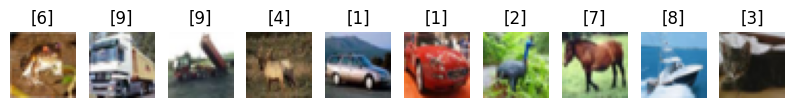

In [10]:
N=10  # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(train_X[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(train_Y[i]))
    plt.axis('off')
plt.show()

In [11]:
train_X[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
train_X = train_X.astype('float32')
train_X = train_X.reshape(train_X.shape[0],32,32,3)
train_X = train_X / 255.

test_X = test_X.astype('float32')
test_X = test_X.reshape(test_X.shape[0], 32,32,3)
test_X = test_X / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape)


Training data :  (50000, 32, 32, 3)

Testing data :  (10000, 32, 32, 3)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (32, 32, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 10, activation = 'softmax')) 

In [14]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [15]:
MODEL1=model_1.fit(train_X, train_Y, epochs = 15, validation_data = (test_X, test_Y), initial_epoch=0)

Epoch 1/15
1563/1563 [==============================] - 70s 43ms/step - loss: 1.3068 - accuracy: 0.5406 - val_loss: 1.0185 - val_accuracy: 0.6496
Epoch 2/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9359 - accuracy: 0.6760 - val_loss: 0.9043 - val_accuracy: 0.6834
Epoch 3/15
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7977 - accuracy: 0.7235 - val_loss: 0.8669 - val_accuracy: 0.7049
Epoch 4/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7073 - accuracy: 0.7556 - val_loss: 0.8799 - val_accuracy: 0.7048
Epoch 5/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6347 - accuracy: 0.7788 - val_loss: 0.8794 - val_accuracy: 0.7112
Epoch 6/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5741 - accuracy: 0.8004 - val_loss: 0.8636 - val_accuracy: 0.7182
Epoch 7/15
1563/1563 [==============================] - 68s 44ms/step - loss: 0.5202 - accuracy: 0.8176 - val_loss: 0.8789 -

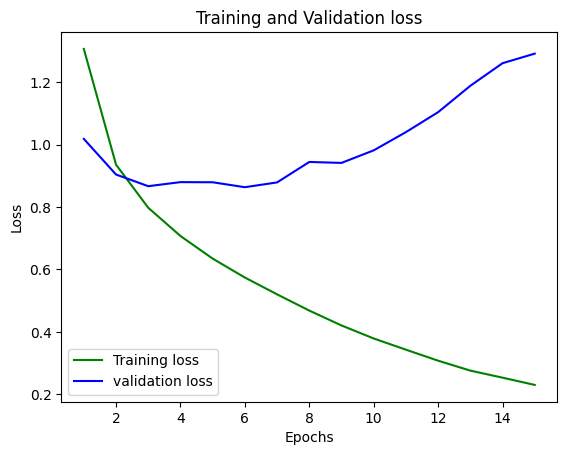

In [16]:
EPOCH=15
loss_train = MODEL1.history['loss']
loss_val = MODEL1.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


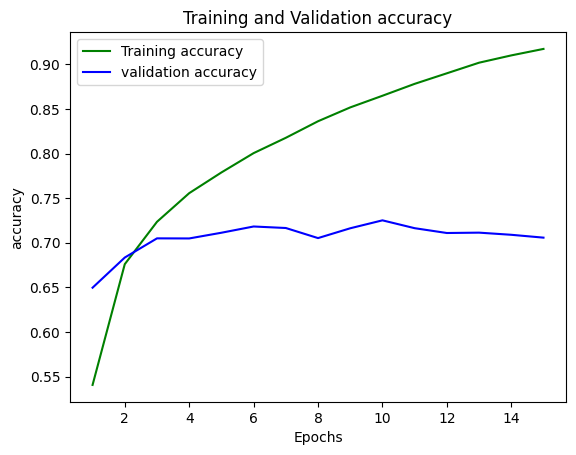

In [18]:
EPOCH=15
Acc_train = MODEL1.history['accuracy']
Acc_val = MODEL1.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()